### Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving GoogleReview_data_cleaned.csv to GoogleReview_data_cleaned.csv


In [ ]:
import pandas as pd

# Load CSV file
df = pd.read_csv('GoogleReview_data_cleaned.csv')

# Display the first few rows
df.head()


,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


## Preprocessing Setup

In [ ]:
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Preprocessing Function (with stemming)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_review(text):
    text = text.lower()

    # Tokenize without using sentence tokenizer (this avoids 'punkt_tab')
    tokens = word_tokenize(text, preserve_line=True)

    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens



In [ ]:
df['Processed_Tokens'] = df['Review'].apply(clean_review)
df[['Review', 'Processed_Tokens']].head()


,Review,Processed_Tokens
0,Came here for the High Tea. Great service espe...,"[came, high, great, servic, especi, friendli, ..."
1,"5 stars for the service, even though some of t...","[star, servic, even, though, staff, need, trai..."
2,"Hi, thank you for your service. But! i feel so...","[hi, thank, feel, sorri, deserv, ur, nasi, lem..."
3,I have the worse buffer dinner ever so far. Th...,"[wors, buffer, dinner, ever, spread, small, ch..."
4,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...","[known, elmark, kdk, ceil, fan, ca, believ, kn..."


## Part-of-Speech (POS) Tagging

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

# Tag POS for the first review
nltk.pos_tag(df['Processed_Tokens'][0])


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('came', 'VBD'),
 ('high', 'JJ'),
 ('great', 'JJ'),
 ('servic', 'JJ'),
 ('especi', 'NN'),
 ('friendli', 'NN'),
 ('accommod', 'NN'),
 ('thank', 'NN'),
 ('great', 'JJ'),
 ('servic', 'NN')]

## Clean Tokens Without Stemming

In [ ]:
# to keep original word forms for better accuracy in POS tagging and NER

def clean_review_no_stem(text):
    text = text.lower()
    tokens = word_tokenize(text, preserve_line=True)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens


In [ ]:
df['Clean_Tokens'] = df['Review'].apply(clean_review_no_stem)
nltk.pos_tag(df['Clean_Tokens'][0])


[('came', 'VBD'),
 ('high', 'JJ'),
 ('great', 'JJ'),
 ('service', 'NN'),
 ('especially', 'RB'),
 ('friendly', 'JJ'),
 ('accommodating', 'VBG'),
 ('thank', 'NN'),
 ('great', 'JJ'),
 ('service', 'NN')]

## Part-of-Speech (POS) Tagging

In [ ]:
# assign grammatical roles (noun, verb, adjective, etc.) to each token using `nltk.pos_tag`

# POS tagging all reviews

df['POS_Tags'] = df['Clean_Tokens'].apply(nltk.pos_tag)
df[['Review', 'POS_Tags']].head()


,Review,POS_Tags
0,Came here for the High Tea. Great service espe...,"[(came, VBD), (high, JJ), (great, JJ), (servic..."
1,"5 stars for the service, even though some of t...","[(stars, NNS), (service, NN), (even, RB), (tho..."
2,"Hi, thank you for your service. But! i feel so...","[(hi, NN), (thank, NN), (feel, NN), (sorry, JJ..."
3,I have the worse buffer dinner ever so far. Th...,"[(worse, JJR), (buffer, NN), (dinner, NN), (ev..."
4,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...","[(known, VBN), (elmark, JJ), (kdk, NN), (ceili..."


## Word Cloud

In [ ]:
!pip install wordcloud


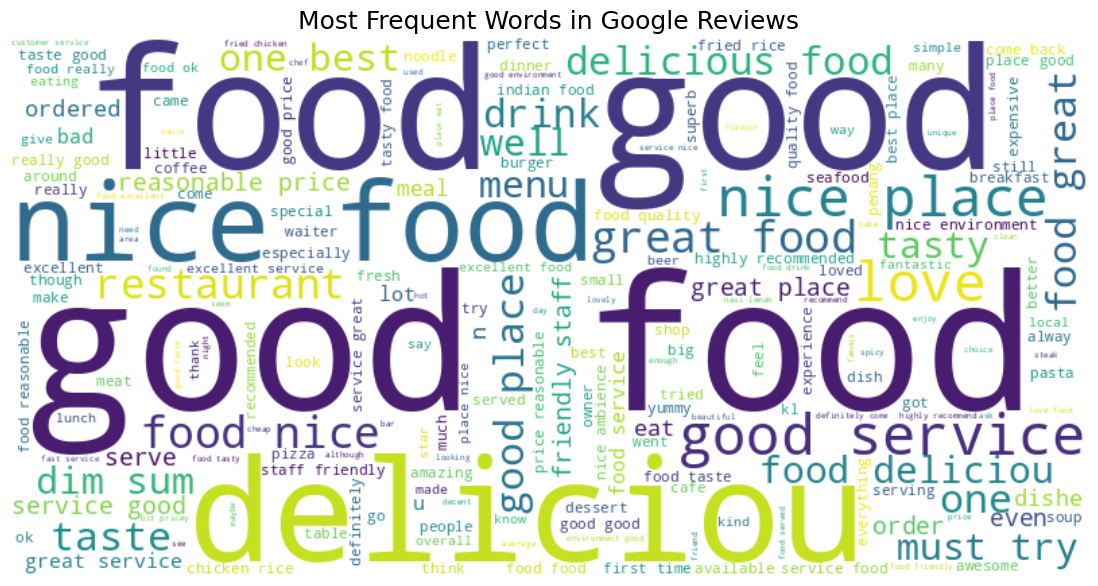

In [ ]:
# this visualization shows the most frequent words used in the Google Reviews

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cleaned tokens into one string
all_words = ' '.join([' '.join(tokens) for tokens in df['Clean_Tokens']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Show it
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Google Reviews", fontsize=18)
plt.show()


## Named Entity Recognition (NER)

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# we use SpaCy to detect real-world entities like locations, organizations, and people mentioned in the reviews

import spacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Choose a review and process it
text = df['Review'][0]
doc = nlp(text)

# Extract named entities (NER for one review)
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")


Jeet → PERSON


In [ ]:
# Store NER for All Reviews
df['Named_Entities'] = df['Review'].apply(lambda text: [(ent.text, ent.label_) for ent in nlp(text).ents])
df[['Review', 'Named_Entities']].head()

In [ ]:
# test with a known example that includes names or locations
doc = nlp("I had lunch at K Fry in Kuala Lumpur and it cost RM20.")
[(ent.text, ent.label_) for ent in doc.ents]


[('K Fry', 'FAC'), ('Kuala Lumpur', 'GPE')]

In [ ]:
df['Named_Entities_Formatted'] = df['Named_Entities'].apply(lambda ents: ', '.join([f"{text} ({label})" for text, label in ents]))


In [ ]:
df[['Review', 'Named_Entities_Formatted']].head()


,Review,Named_Entities_Formatted
0,Came here for the High Tea. Great service espe...,Jeet (PERSON)
1,"5 stars for the service, even though some of t...",5 (CARDINAL)
2,"Hi, thank you for your service. But! i feel so...","Nasi Lemak Specialll (ORG), yesterday (DATE), ..."
3,I have the worse buffer dinner ever so far. Th...,
4,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",""" & KDK (ORG), 3 (CARDINAL), 1 (CARDINAL), Cei..."


---
## Summary of Completed Tasks

### Basic NLP Preprocessing

| Task                    | Status | Description |
|-------------------------|--------|-------------|
| Tokenization          | Done | Split text into individual words using `word_tokenize()` |
| Case Folding          | Done | Converted all text to lowercase using `.lower()` |
| Punctuation Removal   | Done | Removed punctuation using `word.isalpha()` |
| Stopword Removal      | Done | Removed common English words with `nltk.corpus.stopwords` |
| Stemming              | Done | Applied `PorterStemmer` to reduce words to root form |
| POS Tagging           | Done | Used `nltk.pos_tag()` to label each word’s part of speech |
| Abbreviation Handling | Not Done | Did not normalize abbreviations like "u" → "you" |

---

### Text Processing Tasks

| Task                        | Status | Description |
|-----------------------------|--------|-------------|
| Word Sense Disambiguation| Not Done | Not implemented — advanced contextual task |
| Translation              | Not Done | Not applicable for this dataset |
| Named Entity Recognition | Done | Used SpaCy to extract entities like names, places, orgs |
| Summarization            | Not Done | No summarization method used |
| Word Cloud               | Done | Generated visual of most frequent words using `WordCloud` |
